In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
dataset = pd.read_pickle('final_filled_n_10_dataset.pkl')

# fill with zeros
dataset['percent_of_oct_deaths_in_oct_and_sept'] = dataset['percent_of_oct_deaths_in_oct_and_sept'].fillna(0)
dataset['percent_of_oct_cases_in_oct_and_sept'] = dataset['percent_of_oct_cases_in_oct_and_sept'].fillna(0)
#######

# remove nans
# dataset = dataset.dropna()
# dataset = dataset.reset_index()
######

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   countryterritoryCode                   212 non-null    object 
 1   countriesAndTerritories                212 non-null    object 
 2   percent_of_oct_cases_in_oct_and_sept   212 non-null    float64
 3   percent_of_oct_deaths_in_oct_and_sept  212 non-null    float64
 4   cases_since_sept_per100k               212 non-null    float64
 5   deaths_since_sept_per100k              212 non-null    float64
 6   avg_temp                               212 non-null    float64
 7   gdp_per_capita                         212 non-null    float64
 8   pop_density                            212 non-null    float64
 9   med_beds                               212 non-null    float64
 10  physicians                             212 non-null    float64
 11  pop_ab

In [35]:
labelless_dataset = dataset.drop(columns=['countriesAndTerritories', 'countryterritoryCode'])
labelless_dataset = pd.DataFrame(data=StandardScaler().fit_transform(labelless_dataset), columns=labelless_dataset.columns)
labelless_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   percent_of_oct_cases_in_oct_and_sept   212 non-null    float64
 1   percent_of_oct_deaths_in_oct_and_sept  212 non-null    float64
 2   cases_since_sept_per100k               212 non-null    float64
 3   deaths_since_sept_per100k              212 non-null    float64
 4   avg_temp                               212 non-null    float64
 5   gdp_per_capita                         212 non-null    float64
 6   pop_density                            212 non-null    float64
 7   med_beds                               212 non-null    float64
 8   physicians                             212 non-null    float64
 9   pop_above_65                           212 non-null    float64
 10  traffic_mortality                      212 non-null    float64
 11  PM25  

In [36]:
pca = PCA(n_components=2)
components = pca.fit_transform(labelless_dataset)
components_df = pd.DataFrame(data=components, columns=['x', 'y'])
components_df['countryterritoryCode'] = dataset.countryterritoryCode
components_df

,x,y,countryterritoryCode
0,-1.629917,-0.738609,AFG
1,0.712386,-0.698347,ALB
2,-1.552371,-0.308048,DZA
3,4.635181,-3.398497,AND
4,-1.986157,-0.529875,AGO
...,...,...,...
207,-1.812986,0.718242,VNM
208,-1.360519,2.076220,ESH
209,-3.073359,0.187517,YEM
210,-2.228764,0.415061,ZMB


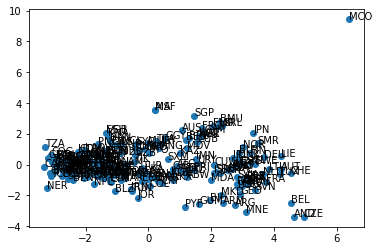

In [37]:
fig, ax = plt.subplots()
ax.scatter(components_df.x, components_df.y)

for val in components_df.countryterritoryCode:
    row = components_df[components_df['countryterritoryCode'] == val]
    if not row.empty:
        ax.annotate(val, (row.x, row.y))

plt.savefig('PCA_n_2_dropna.pdf')
plt.show()

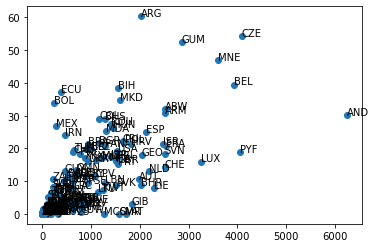

In [38]:
cases_and_deaths = dataset[['countryterritoryCode', 'cases_since_sept_per100k', 'deaths_since_sept_per100k']]


fig1, ax1 = plt.subplots()
ax1.scatter(cases_and_deaths.cases_since_sept_per100k, cases_and_deaths.deaths_since_sept_per100k)

for val in cases_and_deaths.countryterritoryCode:
    row = cases_and_deaths[cases_and_deaths.countryterritoryCode == val]
    if not row.empty:
        ax1.annotate(val, (row.cases_since_sept_per100k, row.deaths_since_sept_per100k))

plt.show()

In [39]:
pca1 = PCA(n_components=len(labelless_dataset.columns))
components1 = pca1.fit_transform(labelless_dataset)
intrinsic_df = pd.DataFrame(data=components1, columns=labelless_dataset.columns)

In [40]:
print(pca1.explained_variance_ratio_)

[0.41515571 0.15436537 0.09331961 0.08182584 0.05235265 0.04804017
 0.04019995 0.03357394 0.03067583 0.02115491 0.01566763 0.01366839]
